# Telecom Customer Churn Analysis
## Data Overview and Data Cleaning

This notebook covers the initial exploration and data cleaning steps for a telecom customer churn analysis.
The goal is to understand the dataset structure, identify data quality issues, and prepare clean data for further analysis.

## Imports

We import the required Python libraries for data manipulation and analysis.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Dataset Overview

We start by loading the Telco Customer Churn dataset and inspecting its basic structure, including the number of records, features, and data types.

In [2]:
pd.set_option("display.max_columns", None)

path = "../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

## 2. Data Quality Check

Before performing any analysis, we check for potential data quality issues such as incorrect data types or missing values that could affect the results.


In [5]:
df["TotalCharges"].head(10)

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: str

In [6]:
df[df["TotalCharges"].str.strip() == ""].shape

(11, 21)

In [9]:
df[df["TotalCharges"].str.strip() == ""].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


### Handling missing values in TotalCharges

The `TotalCharges` column should represent the total amount paid by a customer.
However, some records contain missing values stored as empty strings.

These cases correspond to customers with zero tenure, meaning they are new customers who have not yet made any payments.
To reflect this business logic, missing values in `TotalCharges` were replaced with 0.


In [10]:
df["TotalCharges"] = df["TotalCharges"].str.strip()
df["TotalCharges"] = df["TotalCharges"].replace("", "0")

In [11]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

## 3. Clean Dataset Summary

After handling data quality issues, we verify that all columns have appropriate data types and the dataset is ready for exploratory analysis.


In [12]:
df.info()
df[df["tenure"] == 0][["tenure", "MonthlyCharges", "TotalCharges"]].head()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,0.0
753,0,20.25,0.0
936,0,80.85,0.0
1082,0,25.75,0.0
1340,0,56.05,0.0


## 4. Customer Churn Overview

Customer churn represents the percentage of customers who have stopped using the service.
Understanding the overall churn rate provides a baseline for further segmentation and root cause analysis.


In [14]:
# Overall churn rate
churn_counts = df["Churn"].value_counts()
churn_rate = churn_counts["Yes"] / len(df)

churn_counts, churn_rate

(Churn
 No     5174
 Yes    1869
 Name: count, dtype: int64,
 np.float64(0.2653698707936959))

The churn rate represents the proportion of customers who have left the company.
This metric serves as a baseline and reference point for comparing churn across different customer segments.

### Churn as a Key Performance Indicator (KPI)

The overall churn rate is treated as a key performance indicator (KPI).
It provides a high-level view of customer retention and helps identify whether churn levels are acceptable or require immediate action.


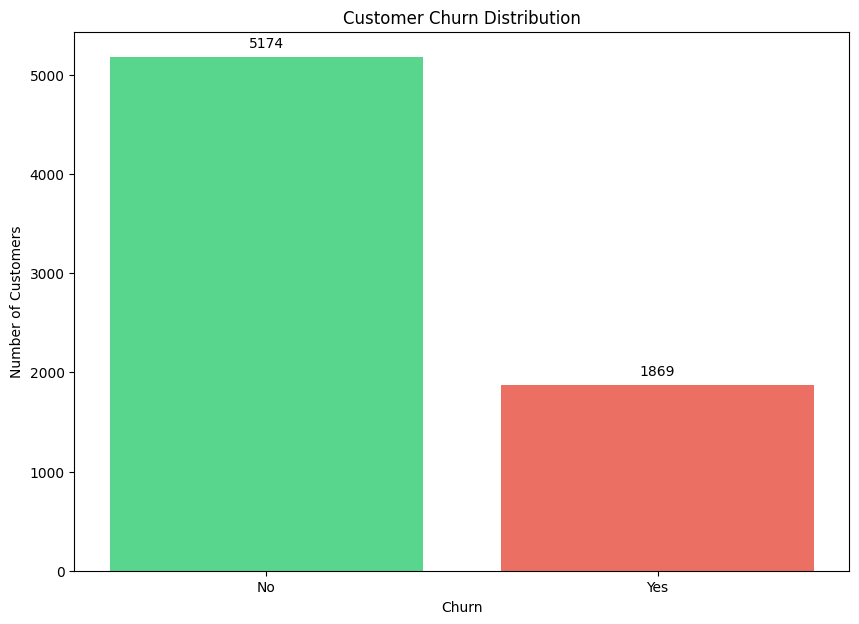

In [35]:
plt.figure(figsize = (10, 7))
colors = ["#2ecc71", "#e74c3c"]
bars = plt.bar(churn_counts.index, churn_counts.values,color = colors, alpha = 0.8)
plt.bar_label(bars,labels=churn_counts.values,padding=5)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

While the overall churn rate summarizes the general retention situation, it does not explain why customers leave.
To gain actionable insights, the next step is to analyze churn across different customer segments.